Dataset Head:
    Class  Alcohol  Malic_Acid   Ash  Alkalinity_of_Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280_OD315_of_Diluted_Wines  Proline  
0             5.64  1.04                          3.92     1065  
1          

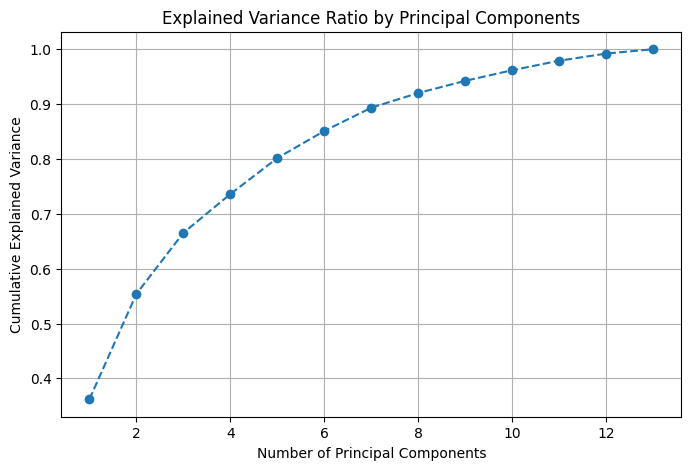

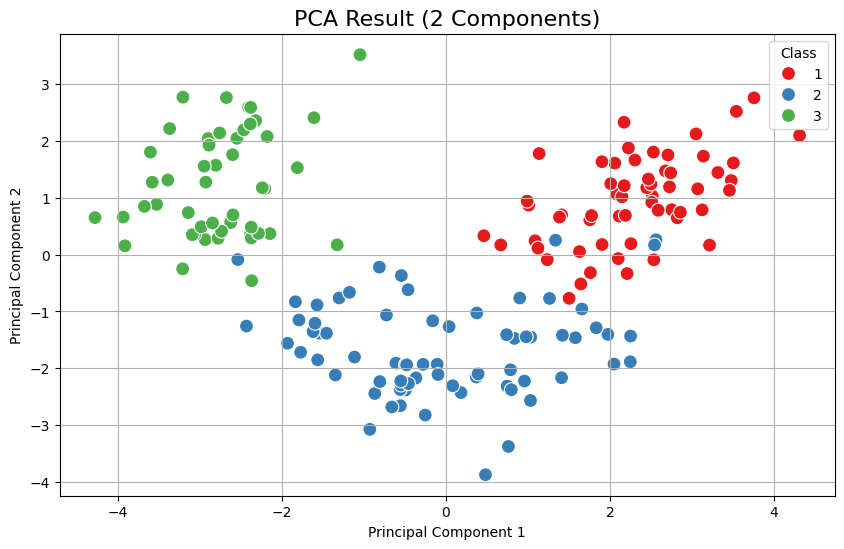


Silhouette Score for Clustering: 0.5601697480957203


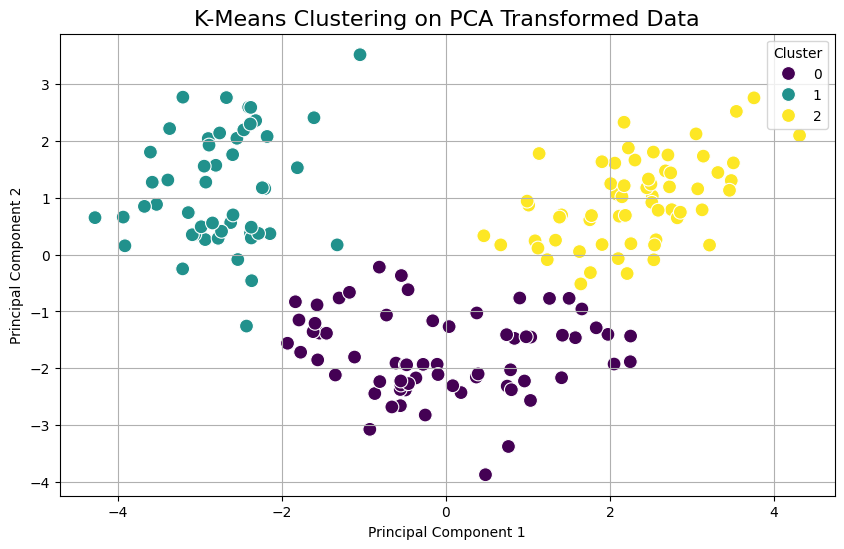


Summary of PCA and Clustering Analysis:
- Total variance explained by the first 2 principal components: 0.55
- Silhouette score for K-Means clustering: 0.56


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [
    "Class", "Alcohol", "Malic_Acid", "Ash", "Alkalinity_of_Ash", "Magnesium",
    "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins",
    "Color_Intensity", "Hue", "OD280_OD315_of_Diluted_Wines", "Proline"
]
data = pd.read_csv(url, header=None, names=columns)

# Inspect the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Split the dataset into features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Data Preprocessing: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Implementation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance:\n", explained_variance)

# Determine the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Retain 2 principal components for visualization
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Scatter plot of PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='Set1', s=100)
plt.title('PCA Result (2 Components)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='best')
plt.grid()
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_2d)

# Silhouette score
silhouette_avg = silhouette_score(X_pca_2d, clusters)
print("\nSilhouette Score for Clustering:", silhouette_avg)

# Visualize Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('K-Means Clustering on PCA Transformed Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.show()

# Summary
print("\nSummary of PCA and Clustering Analysis:")
print(f"- Total variance explained by the first 2 principal components: {explained_variance[1]:.2f}")
print(f"- Silhouette score for K-Means clustering: {silhouette_avg:.2f}")
